In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d radhesyam/indian-vehicle-dataset

 99% 503M/507M [00:04<00:00, 122MB/s]
100% 507M/507M [00:04<00:00, 120MB/s]


In [ ]:
!unzip /content/indian-vehicle-dataset.zip


Archive:  /content/indian-vehicle-dataset.zip
  inflating: IVDB/auto_test/Thumbs.db  
  inflating: IVDB/auto_test/img001.JPG  
  inflating: IVDB/auto_test/img002.JPG  
  inflating: IVDB/auto_test/img003.JPG  
  inflating: IVDB/auto_test/img004.JPG  
  inflating: IVDB/auto_test/img005.JPG  
  inflating: IVDB/auto_test/img006.JPG  
  inflating: IVDB/auto_test/img007.JPG  
  inflating: IVDB/auto_test/img008.JPG  
  inflating: IVDB/auto_test/img009.JPG  
  inflating: IVDB/auto_test/img010.JPG  
  inflating: IVDB/auto_test/img011.JPG  
  inflating: IVDB/auto_test/img012.png  
  inflating: IVDB/auto_test/img013.png  
  inflating: IVDB/auto_test/img014.png  
  inflating: IVDB/auto_test/img015.png  
  inflating: IVDB/auto_test/img016.png  
  inflating: IVDB/auto_test/img017.png  
  inflating: IVDB/auto_test/img018.png  
  inflating: IVDB/auto_test/img019.png  
  inflating: IVDB/auto_test/img020.png  
  inflating: IVDB/auto_test/img021.png  
  inflating: IVDB/auto_test/img022.png  
  inflating:

In [ ]:
!pip install imgaug

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=6b35473bd566d3edb7765535a44f40e3dca14de8153410d6ac8f6d24876c5fef
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import numpy as np
from imgaug import augmenters as iaa
from skimage import exposure
from skimage.feature import hog
from keras.models import Sequential
import tensorflow as tf
import tensorflow_datasets as tfds
from skimage import feature
from tensorflow.keras.models import load_model
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
import csv


In [ ]:
path_test = "/content/IVDB"
CATEGORIES = ["auto_train","bus_train","cars_train","lorry_train"]
IMG_SIZE = 200


In [ ]:
training = []

def TrainingData():
    for i, category in enumerate(CATEGORIES):
        path = os.path.join(path_test, category)
        print(path)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))

            # Check if the image is loaded successfully
            if img_array is not None:
                # Resize the image to (224, 224)
                new_array = cv2.resize(img_array, (224, 224))

                if new_array.shape[-1] == 4:
                    new_array = new_array[:, :, :3]

                training.append([new_array, class_num])
            else:
                print(f"Error reading image: {os.path.join(path, img)}")

TrainingData()


/content/IVDB/auto_train
Error reading image: /content/IVDB/auto_train/Thumbs.db
/content/IVDB/bus_train
Error reading image: /content/IVDB/bus_train/Thumbs.db
/content/IVDB/cars_train
Error reading image: /content/IVDB/cars_train/Thumbs.db
/content/IVDB/lorry_train
Error reading image: /content/IVDB/lorry_train/Thumbs.db


In [ ]:
print(len(training))

766


In [ ]:
path_test = "/content/IVDB"
CATEGORIES = ["auto_test","bus_test","cars_test","lorry_test"]



In [ ]:
def TrainingData():
    for i, category in enumerate(CATEGORIES):
        path = os.path.join(path_test, category)
        print(path)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))

            # Check if the image is loaded successfully
            if img_array is not None:
                # Resize the image to (224, 224)
                new_array = cv2.resize(img_array, (224, 224))

                if new_array.shape[-1] == 4:
                    new_array = new_array[:, :, :3]

                training.append([new_array, class_num])
            else:
                print(f"Error reading image: {os.path.join(path, img)}")

TrainingData()


In [ ]:
print(len(training))

1009


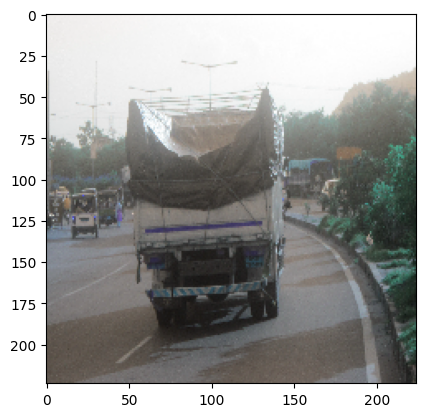

0


In [ ]:
plt.imshow(training[0][0])
plt.show()
print(training[0][1])

In [ ]:
random.shuffle(training)

In [ ]:
X =[]
y =[]
for features, label in training:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, 224, 224, 3)

In [ ]:
X = X.astype('float32')
X /= 255


[0. 0. 1. 0.]


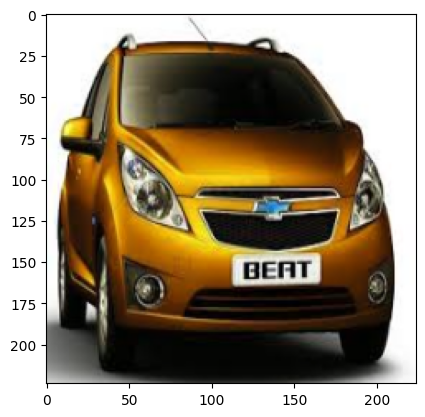

In [ ]:

from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, 4)
print(Y[1])
plt.imshow(X[1])
plt.show()

In [ ]:
seq_sharpen = iaa.Sequential([
    iaa.Sharpen(alpha=(0.5, 1.0), lightness=(0.5, 2.0))
])

# Create an augmentation sequence for Gaussian blur
seq_gaussian_blur = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0, 1.0))
])

# Apply sharpening to all images
augmented_images_sharpen = seq_sharpen.augment_images(X)

# Apply Gaussian blur to all images
augmented_images_blur = seq_gaussian_blur.augment_images(X)

# Concatenate the original and augmented data
augmented_images = np.vstack([X, augmented_images_sharpen, augmented_images_blur])
augmented_labels = np.hstack([y, y, y])


In [ ]:
augmented_images.shape

(3027, 224, 224, 3)

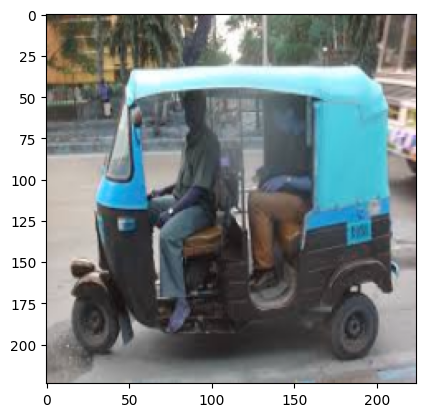

In [ ]:
plt.imshow(augmented_images[5])
plt.show()

In [ ]:
import gc
gc.collect()

10561

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# Load pre-trained ResNet50 model without the final classification layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Create a new model with ResNet50 up to a certain layer
# In this example, we use the layer before the global average pooling layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)

# Preprocess your images
X_preprocessed = preprocess_input(augmented_images)

# Extract features from your images
features = feature_extractor.predict(X_preprocessed)

# Optionally, you can flatten the features for further processing
flattened_features = features.reshape(features.shape[0], -1)


95/95 [==============================] - 15s 100ms/step


In [ ]:
flattened_features.shape

(3027, 100352)

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# Load the pre-trained VGG16 model
x_base_model = VGG16(weights='imagenet', include_top=False)

# Define the layer from which you want to extract features
# In this case, we'll use the output of the last convolutional layer in block5
x_feature_layer = x_base_model.get_layer('block5_conv3')

# Create a new model that outputs the features from the chosen layer
x_model = Model(inputs=x_base_model.input, outputs=x_feature_layer.output)

x_img_array = preprocess_input(augmented_images)

# Get the features for the input image
x_features = x_model.predict(x_img_array)


# The 'features' variable now contains the extracted features for the input image
# You can use these features for your specific task or analysis


95/95 [==============================] - 24s 174ms/step


In [ ]:
x_flattened_features = x_features.reshape(x_features.shape[0], -1)

In [ ]:
x_flattened_features.shape

(3027, 100352)

In [ ]:
import gc
gc.collect()

0

In [ ]:
count=0
for i in range(0,3000):
    if(x_flattened_features[0][i] != flattened_features[0][i]) :
        count+=1
print(count)

183


**PCA for dimensionality reduction**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler().fit_transform(flattened_features)
pca = PCA(n_components=3000)
X_pca = pca.fit_transform(X_standardized)

In [ ]:
np.save('resnet_features.npy',X_pca)
np.save('resnet_labels.npy',augmented_labels)

**Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, augmented_labels, test_size=0.2, random_state=42)

**Random Forest without cross validation**

Test Accuracy: 0.6964
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       114
           1       1.00      0.23      0.37        75
           2       0.69      0.92      0.79       267
           3       0.69      0.63      0.66       150

    accuracy                           0.70       606
   macro avg       0.76      0.59      0.61       606
weighted avg       0.73      0.70      0.67       606



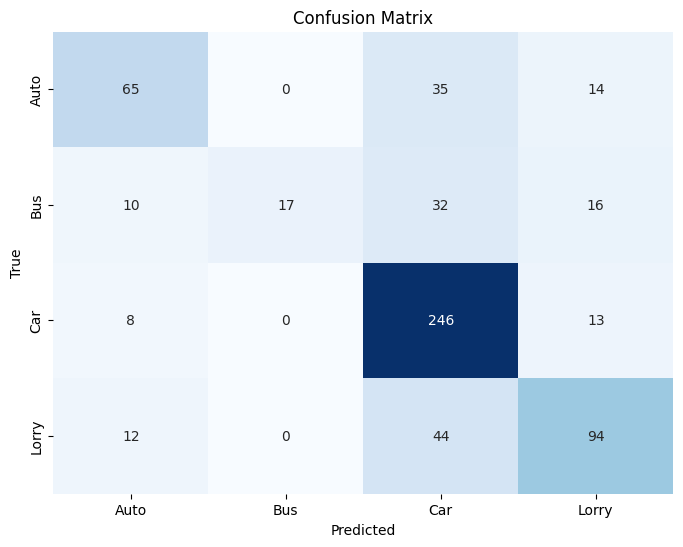

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Random Forest with cross validation**

Cross-Validation Scores: [0.72371134 0.68595041 0.67975207 0.70867769 0.69834711]
Mean Accuracy: 0.6993
Test Accuracy: 0.7013
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.56      0.64       114
           1       0.94      0.23      0.37        75
           2       0.67      0.93      0.78       267
           3       0.72      0.65      0.68       150

    accuracy                           0.70       606
   macro avg       0.77      0.59      0.62       606
weighted avg       0.73      0.70      0.68       606



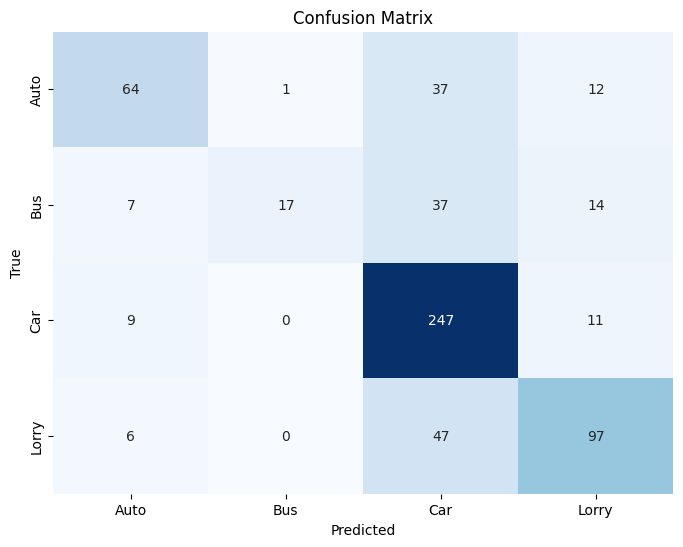

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Perform cross-validation on the training set
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Logistic Regression without cross validation**

Test Accuracy: 0.8630
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       114
           1       0.87      0.77      0.82        75
           2       0.90      0.93      0.91       267
           3       0.81      0.83      0.82       150

    accuracy                           0.86       606
   macro avg       0.85      0.84      0.84       606
weighted avg       0.86      0.86      0.86       606



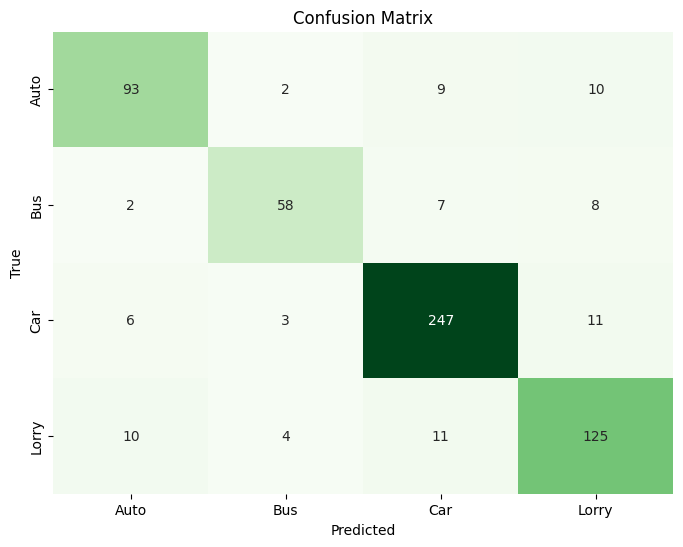

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model on the entire training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Logistic Regression with cross validation**

Cross-Validation Scores: [0.83505155 0.8285124  0.83884298 0.83057851 0.84710744]
Mean Accuracy: 0.8360
Test Accuracy: 0.8630
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       114
           1       0.87      0.77      0.82        75
           2       0.90      0.93      0.91       267
           3       0.81      0.83      0.82       150

    accuracy                           0.86       606
   macro avg       0.85      0.84      0.84       606
weighted avg       0.86      0.86      0.86       606



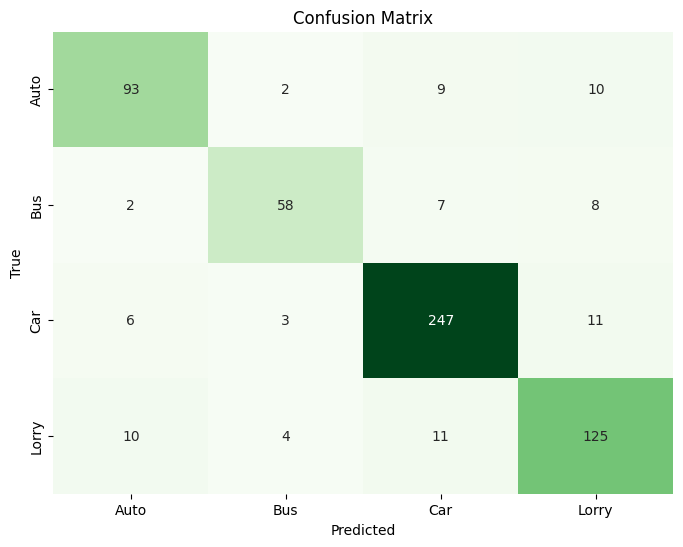

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Perform cross-validation on the training set
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**KNN without cross validation**

Test Accuracy: 0.6337
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       114
           1       0.35      0.24      0.28        75
           2       0.72      0.88      0.79       267
           3       0.56      0.53      0.54       150

    accuracy                           0.63       606
   macro avg       0.56      0.52      0.53       606
weighted avg       0.61      0.63      0.62       606



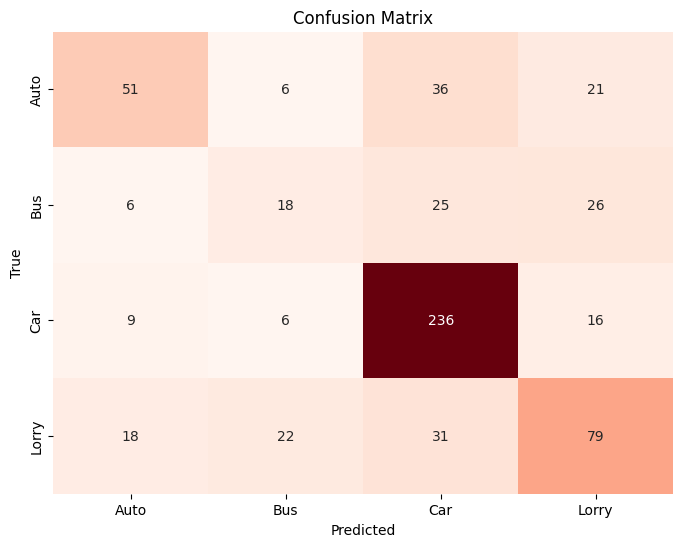

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a K-Nearest Neighbors model with, for example, k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the entire training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**KNN with cross validation**

Cross-Validation Scores: [0.6742268  0.6322314  0.62603306 0.64669421 0.65082645]
Mean Accuracy: 0.6460
Test Accuracy: 0.6337
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       114
           1       0.35      0.24      0.28        75
           2       0.72      0.88      0.79       267
           3       0.56      0.53      0.54       150

    accuracy                           0.63       606
   macro avg       0.56      0.52      0.53       606
weighted avg       0.61      0.63      0.62       606



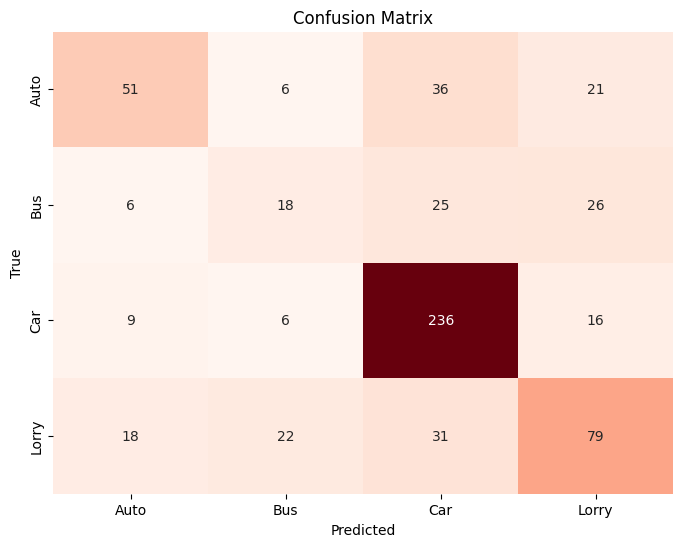

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a K-Nearest Neighbors model with, for example, k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation on the training set
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Decision Tree without cross validation**

Test Accuracy: 0.6320
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       114
           1       0.42      0.45      0.44        75
           2       0.74      0.73      0.73       267
           3       0.62      0.62      0.62       150

    accuracy                           0.63       606
   macro avg       0.58      0.59      0.58       606
weighted avg       0.63      0.63      0.63       606



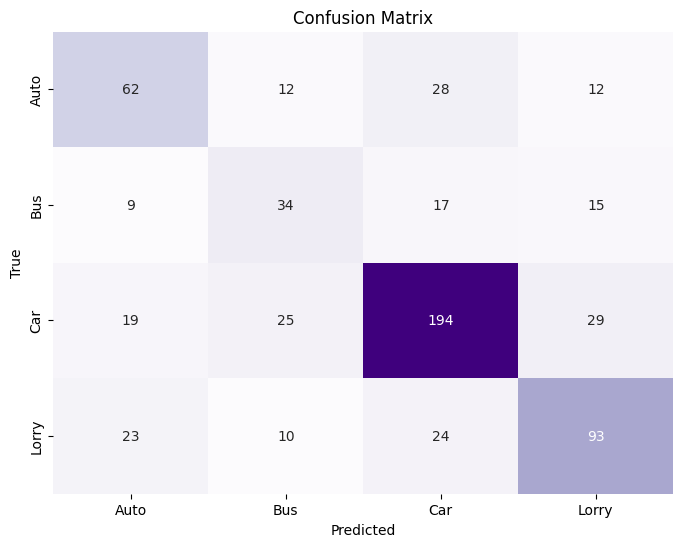

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the entire training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Decision Tree with cross validation**

Cross-Validation Scores: [0.59793814 0.58264463 0.63016529 0.60123967 0.59090909]
Mean Accuracy: 0.6006
Test Accuracy: 0.6320
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       114
           1       0.42      0.45      0.44        75
           2       0.74      0.73      0.73       267
           3       0.62      0.62      0.62       150

    accuracy                           0.63       606
   macro avg       0.58      0.59      0.58       606
weighted avg       0.63      0.63      0.63       606



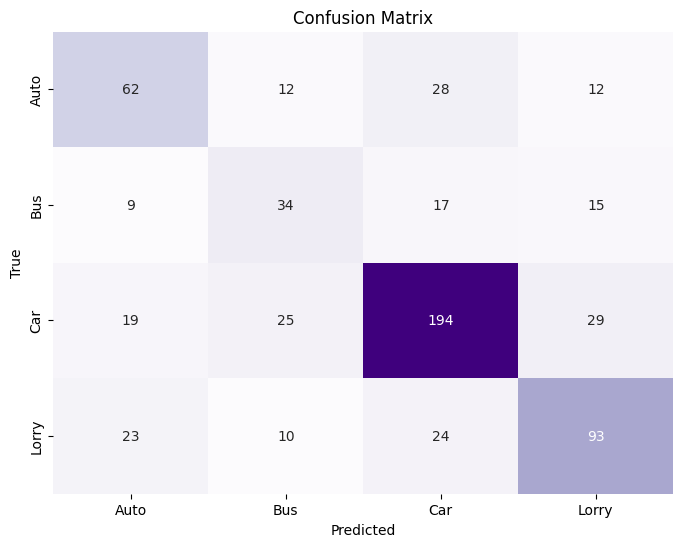

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Naive Bayes without cross validation**

Test Accuracy: 0.3647
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.33      0.31       114
           1       0.25      0.39      0.30        75
           2       0.72      0.27      0.39       267
           3       0.32      0.55      0.41       150

    accuracy                           0.36       606
   macro avg       0.39      0.38      0.35       606
weighted avg       0.48      0.36      0.37       606



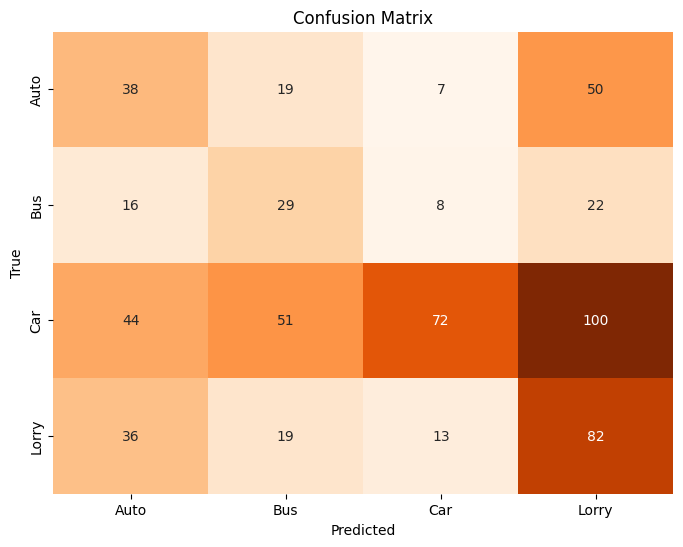

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the entire training set
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Naive Bayes with cross validation**

Cross-Validation Scores: [0.37525773 0.37809917 0.35743802 0.34297521 0.3553719 ]
Mean Accuracy: 0.3618
Test Accuracy: 0.3647
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.33      0.31       114
           1       0.25      0.39      0.30        75
           2       0.72      0.27      0.39       267
           3       0.32      0.55      0.41       150

    accuracy                           0.36       606
   macro avg       0.39      0.38      0.35       606
weighted avg       0.48      0.36      0.37       606



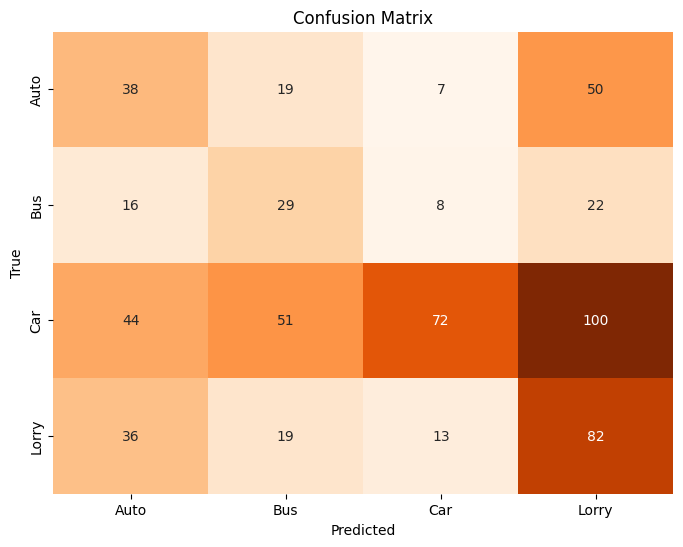

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform cross-validation on the training set
cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**SVM without cross validation**

Test Accuracy: 0.8713
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.79      0.81      0.80        75
           2       0.92      0.92      0.92       267
           3       0.86      0.83      0.84       150

    accuracy                           0.87       606
   macro avg       0.85      0.85      0.85       606
weighted avg       0.87      0.87      0.87       606



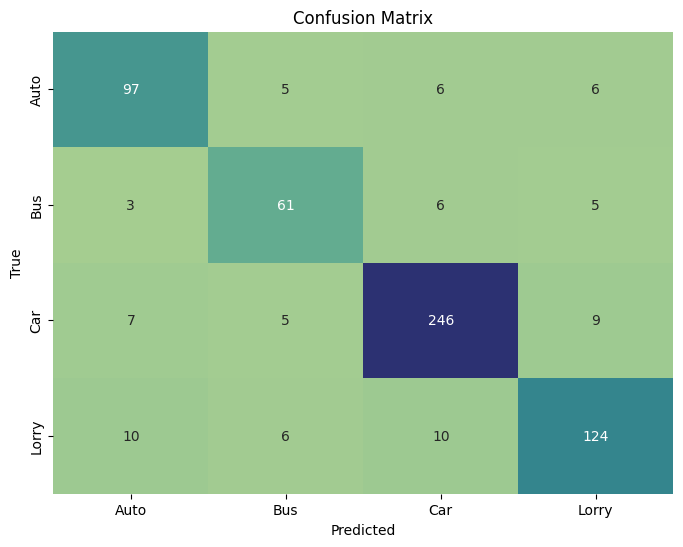

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a linear SVM model with a specified C parameter (adjust as needed)
svm_model = SVC(kernel='linear', C=0.8)

# Train the model on the entire training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**SVM with cross validation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a linear SVM model with a specified C parameter (adjust as needed)
svm_model = SVC(kernel='linear', C=0.1)

# Perform cross-validation on the training set
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import gc
gc.collect()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a linear SVM model with a specified C parameter (adjust as needed)
svm_model = SVC(kernel='linear', C=0.8)

# Perform cross-validation on the training set
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))

# Train the model on the entire training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot colored confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False,
            xticklabels=['Auto', 'Bus', 'Car', 'Lorry'], yticklabels=['Auto', 'Bus', 'Car', 'Lorry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
